# Problem Statement
The given dataset is related to Indian patients who have been tested for a liver disease. Based on chemical compounds (bilrubin,albumin,protiens,alkaline phosphatase) present in human body and tests like SGOT, SGPT the outcome mentioned is whether person is a patient i.e, whether he needs to be diagnosed further or not.


# Attributes for dataset are as follows:
Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,
Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,
Albumin_and_Globulin_Ratio,Class.



### Importing basic libraries

In [1]:
import pandas as pd
import numpy as np

### Loading the dataset

In [2]:
patient_data = pd.read_csv("D:/R_CSV_folder/Semester_2_evaluation/IndianLiverPatientData.txt", delimiter="\t", header=None)

# view of how data is going to look like
patient_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
1,2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
2,3,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No
3,4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No
4,5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No


### Assighning column names to the dataset

In [3]:
patient_data.columns = ["Index","Age","Gender","Total_Bilirubin","Direct_Bilirubin","Alkaline_Phosphotase",
                         "Alamine_Aminotransferase","Aspartate_Aminotransferase","Total_Protiens","Albumin"
                         ,"Albumin_and_Globulin_Ratio","Class"]

In [4]:
# Dropping the the index column as it is not required.
patient_data = patient_data.drop(["Index"],axis=1)
patient_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No


In [5]:
# Now we will see what are the types of data in our dataset
patient_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      563 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              568 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Class                       583 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 50.2+ KB


In [6]:
# from above we can see that there are some missing values present in the data

# Now we know that there are missing values present in the dataset we will find in which columns missing data is present.
patient_data.isnull().sum()

Age                            0
Gender                        20
Total_Bilirubin                0
Direct_Bilirubin               0
Alkaline_Phosphotase           0
Alamine_Aminotransferase       0
Aspartate_Aminotransferase     0
Total_Protiens                15
Albumin                        0
Albumin_and_Globulin_Ratio     4
Class                          0
dtype: int64

#### Missing values in the dataset are are follows:Gender : 20 ,Total_Proteins : 15, Albumin_and_Globulin_Ratio : 4



#### Replacing categorical missing values with "mode" & Continuous values with "median"

In [7]:
# As we know that in python if we apply function on a subobject it also reflects in the original object
patient_data1 = patient_data.copy()


In [8]:
# Replacing categorical variable
patient_data1['Gender'].fillna(patient_data1['Gender'].mode()[0], inplace=True)

In [9]:
# Replacing the continuos variables
for value in ['Albumin_and_Globulin_Ratio', 'Total_Protiens']:
    patient_data1[value].fillna(patient_data1[value].median(), inplace=True)

#### We know that some algorithm require int values, so we need to convert categorical values to integer (in our case "Gender" and "Class")

In [10]:
patient_data1["Gender"] = patient_data1["Gender"].map({"Female":0, "Male":1})
patient_data1["Class"] = patient_data1["Class"].map({"No":0, "Yes":1})   #<---here 1 means patient needs to be diagnosed


In [11]:
# View of data to see if everything is done correctly
patient_data1.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


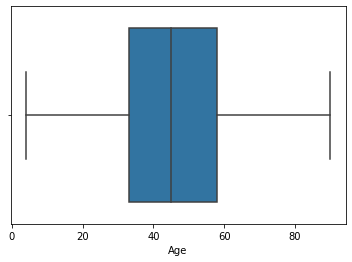

In [12]:
# Now we will see if there are any outliers present in data using boxplot 
import seaborn as sns

# boxplot to see if there are outliers in "age" variable
sns.boxplot(x = patient_data1["Age"])


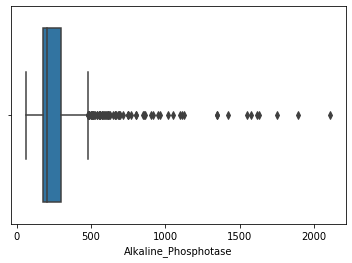

In [13]:
# boxplot to see if there are outliers in "Alkaline_Phosphotase" variable
sns.boxplot(x = patient_data1["Alkaline_Phosphotase"])


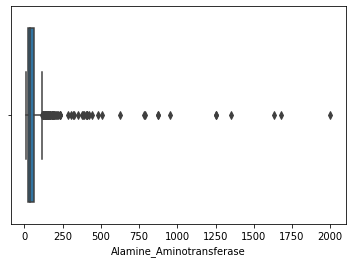

In [14]:
# boxplot to see if there are outliers in "Alamine_Aminotransferase" variable
sns.boxplot(x = patient_data1["Alamine_Aminotransferase"])

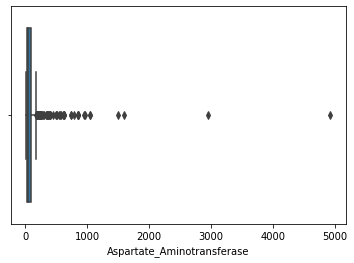

In [15]:
# boxplot to see if there are outliers in "Aspartate_Aminotransferase" variable
sns.boxplot(x = patient_data1["Aspartate_Aminotransferase"])

In [16]:
# looking at outliers setting limit of values that will be in the variables
patient_data2 = patient_data1.loc[patient_data1["Alkaline_Phosphotase"] < 910]
patient_data3 = patient_data2.loc[patient_data2["Alamine_Aminotransferase"] < 500]

### Checking for multicolinearity if present , there are many ways to do it eg. VIF(variation inflation factor), Correlation using pearson test.

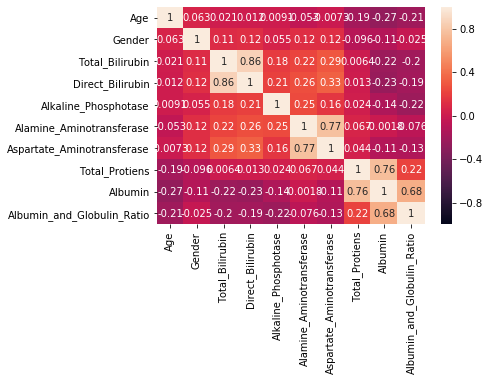

In [17]:
x = patient_data3[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase', 'Alamine_Aminotransferase',
           'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin','Albumin_and_Globulin_Ratio']]
y = patient_data3[['Class']]
corr2 = x.corr(method='pearson')

sns.heatmap(corr2, vmin=-1, vmax=1, annot=True)

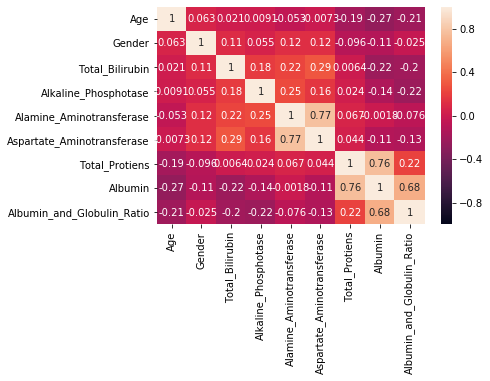

In [18]:
# remove 'Direct_Bilirubin' as it high corelation.
x = patient_data3[['Age', 'Gender', 'Total_Bilirubin','Alkaline_Phosphotase', 'Alamine_Aminotransferase',
           'Aspartate_Aminotransferase', 'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']]
corr3 = x.corr(method = "pearson")

sns.heatmap(corr3, vmin=-1, vmax=1, annot=True)

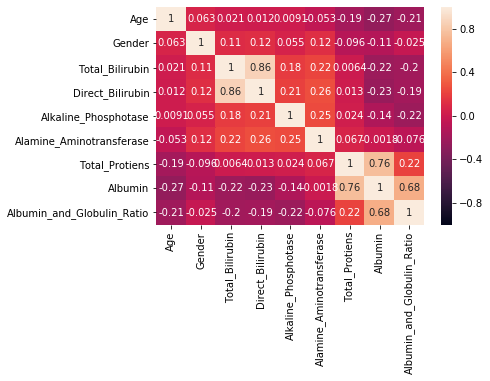

In [19]:
# remove Aspartate_Aminotransferase as it high corelation.
x = patient_data3[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase', 'Alamine_Aminotransferase',
           'Total_Protiens','Albumin', 'Albumin_and_Globulin_Ratio']]
corr4 = x.corr(method="pearson")

sns.heatmap(corr4, vmin=-1, vmax=1, annot=True)

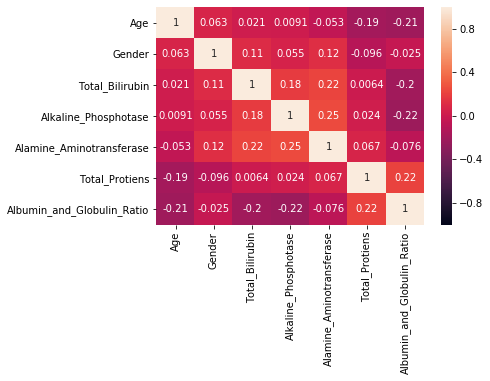

In [20]:
# remove 'Albumin'
x = patient_data3[['Age', 'Gender', 'Total_Bilirubin','Alkaline_Phosphotase', 'Alamine_Aminotransferase',
           'Total_Protiens', 'Albumin_and_Globulin_Ratio']]
corr5 = x.corr(method="pearson")

sns.heatmap(corr5, vmin=-1, vmax=1, annot=True)

In [21]:
# Ratio of people having disease and not having disease
patient_data1['Class'].value_counts()

0    416
1    167
Name: Class, dtype: int64

### As we can we see from variable "Class" is imbalance and we need to balance the data

In [22]:
from sklearn.utils import resample

patient_data4 = pd.concat([x, y], axis=1)
df_majority = patient_data4[patient_data4['Class'] == 0]
df_minority = patient_data4[patient_data4['Class'] == 1]

upSample = resample(df_minority, replace=True, n_samples=388, random_state=0)

patient_data5 = pd.concat([df_majority, upSample])
patient_data5['Class'].value_counts()

1    388
0    388
Name: Class, dtype: int64

### After balancing the data, spliting data into X (independent variables) and Y(dependent variable)

In [23]:
x = patient_data5[['Age', 'Gender', 'Total_Bilirubin','Alkaline_Phosphotase', 'Alamine_Aminotransferase',
           'Total_Protiens', 'Albumin_and_Globulin_Ratio']]
y = patient_data5['Class']

In [24]:
# Standardizing the data ( we can also do normalization)
# standardization has mean of 0 and S.D increasing by 1
# z score = X-mean / S.D

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(x)
x_transformed = scale.transform(x)

### Spliting the data into 0.75(traning) and 0.25(testing)


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.2, random_state=0)

## Applying SVM model to dataset

In [26]:
# create object of class SVC
from sklearn.svm import SVC
model = SVC(C=1)  # i.e cost = 1

# fit
model.fit(x_train,y_train)

# predict
y_pred = model.predict(x_test)

# confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

# print other metrices
# accuracy
print("accuracy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))
print("recall",recall_score(y_test,y_pred))

accuracy 0.7115384615384616
precision 0.6818181818181818
recall 0.8823529411764706


## Applying RandomForest model

In [27]:
# Importing random forest library from sklearn.ensemble and running model

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=450, criterion='entropy',random_state = 5)
rf.fit(x_train, y_train)
ypred_rf = rf.predict(x_test)
confusion_matrix(y_test, ypred_rf)
print(confusion_matrix(y_test, ypred_rf))

# print other metrices
# accuracy
print("accuracy",accuracy_score(y_test,ypred_rf))
print("precision",precision_score(y_test,ypred_rf))
print("recall",recall_score(y_test,ypred_rf))

[[52 19]
 [ 4 81]]
accuracy 0.8525641025641025
precision 0.81
recall 0.9529411764705882


## Applying XGboost model

In [28]:
# Importing 
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=475,criterion = 'entropy',gamma=0.01)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

# print other metrices
# accuracy
print("accuracy",accuracy_score(y_test,y_pred_xgb))
print("precision",precision_score(y_test,y_pred_xgb))
print("recall",recall_score(y_test,y_pred_xgb))

accuracy 0.8461538461538461
precision 0.8080808080808081
recall 0.9411764705882353
Classification_report               precision    recall  f1-score   support

           0       0.91      0.73      0.81        71
           1       0.81      0.94      0.87        85

    accuracy                           0.85       156
   macro avg       0.86      0.84      0.84       156
weighted avg       0.86      0.85      0.84       156



#### Conclusion: As we can see from above results Random forest and XGBoost both are giving good accuracy scores and it now depends on domain expertize person which model model to choose depending on problem statement (considering sensitivity & Specificity)